<a href="https://colab.research.google.com/github/Pranayshukla0610/ML-projects-portfolio/blob/main/Linear_Regression_Variants_for_Housing_Price_Prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


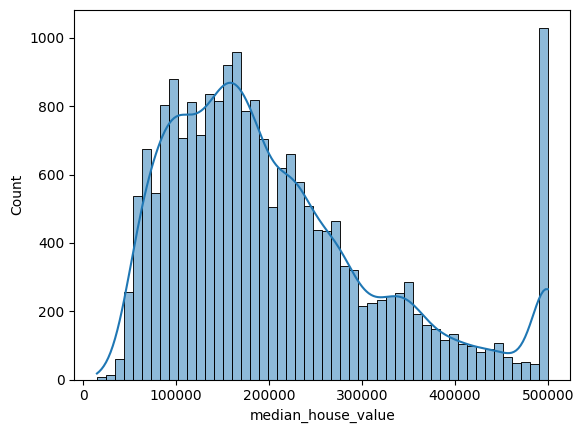

In [4]:
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.show()

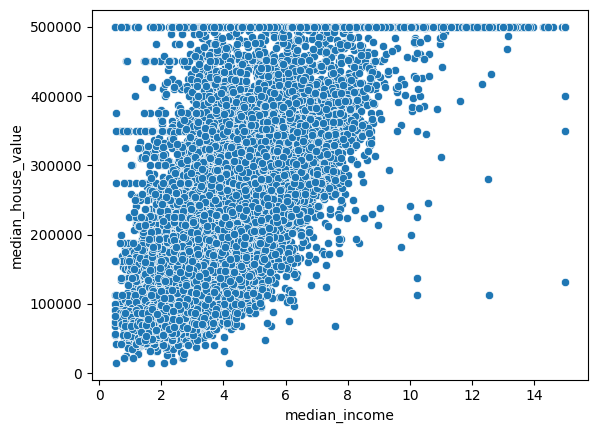

In [5]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.show()

In [6]:
from sklearn.impute import SimpleImputer
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

/tmp/ipython-input-3514409557.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [11]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [18]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [19]:
from sklearn.linear_model import BayesianRidge
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)

BayesianRidge()

In [20]:
from sklearn.linear_model import QuantileRegressor
quantile = QuantileRegressor(alpha=0.1)
quantile.fit(X_train, y_train)

QuantileRegressor(alpha=0.1)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(model, X, y):
    preds = model.predict(X)
    return {
        "RMSE": np.sqrt(mean_squared_error(y, preds)),
        "R2": r2_score(y, preds)
    }

In [22]:
results = {
    "Linear": evaluate(lr, X_test, y_test),
    "Polynomial": evaluate(lr_poly, X_test_poly, y_test),
    "Ridge": evaluate(ridge, X_test, y_test),
    "Lasso": evaluate(lasso, X_test, y_test),
    "ElasticNet": evaluate(elastic, X_test, y_test),
    "Bayesian": evaluate(bayesian, X_test, y_test),
    "Quantile": evaluate(quantile, X_test, y_test)
}

results

{'Linear': {'RMSE': np.float64(70121.59145860492), 'R2': 0.6247707646746932},
 'Polynomial': {'RMSE': np.float64(67244.72222193399),
  'R2': 0.6549281375670042},
 'Ridge': {'RMSE': np.float64(70118.37844731727), 'R2': 0.6248051503217522},
 'Lasso': {'RMSE': np.float64(70121.584429443), 'R2': 0.6247708399025045},
 'ElasticNet': {'RMSE': np.float64(69959.03562196837),
  'R2': 0.6265084606085398},
 'Bayesian': {'RMSE': np.float64(70110.63432548086), 'R2': 0.6248880214389334},
 'Quantile': {'RMSE': np.float64(79829.0531628709), 'R2': 0.5136878764799684}}